# Домашняя работа №2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [46]:
raw_df_train = pd.read_csv('rosbank_train.csv')
raw_df_test = pd.read_csv('rosbank_test.csv')
raw_df_train.head(5)

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


###### Задание 1

In [40]:
cl_ids_train = np.random.choice(raw_df_train.cl_id.unique(), size=4000, replace=False)
cl_ids_train_set = set(cl_ids_train)

cl_ids_test = np.random.choice(raw_df_test.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [41]:
len(cl_ids_train_set)

4000

In [43]:
len(cl_ids_test)

1000

In [48]:
print ('Cамые популярные MCC (target_flag==0)')
df_0=raw_df_train.loc[raw_df['target_flag']==0]
df_0.groupby(['MCC']).sum()['cl_id'].sort_values(ascending=False).head(10)

Cамые популярные MCC (target_flag==0)


MCC
5411    305102633
6011    121318108
5814     67917591
5499     62018474
5812     51613085
5541     46189722
5912     44312817
6012     28625672
5999     24479540
5921     18895619
Name: cl_id, dtype: int64

In [49]:
print ('Cамые популярные MCC (target_flag==1)')
df_1=raw_df_train.loc[raw_df['target_flag']==1]
df_1.groupby(['MCC']).sum()['cl_id'].sort_values(ascending=False).head(10)

Cамые популярные MCC (target_flag==1)


MCC
5411    301623505
6011    129582295
5814    102573921
5812     80413413
5499     70308660
5541     53854571
5912     49515886
5999     36971113
6012     24226847
5921     23983214
Name: cl_id, dtype: int64

In [50]:
print ('Cамые популярные trx_category')
raw_df_train.groupby(['trx_category']).sum()['cl_id'].sort_values(ascending=False).head(10)

Cамые популярные trx_category


trx_category
POS               2004340266
DEPOSIT            132177447
WD_ATM_ROS          77801423
WD_ATM_PARTNER      41512587
C2C_IN              37376588
C2C_OUT             23621891
WD_ATM_OTHER        19930734
BACK_TRX            14250116
CAT                  4351516
CASH_ADV              143330
Name: cl_id, dtype: int64

In [13]:
def get_aggregated_df(df, agg_type, col_to_groupby):
    agg_df = df[['cl_id', col_to_groupby, 'amount']].groupby(['cl_id', col_to_groupby]).agg([agg_type])
    agg_df = agg_df.unstack(fill_value=0)
    agg_df.columns = agg_df.columns.get_level_values(2)

    old_name = agg_df.columns.name
    old_cols = agg_df.columns
    new_cols = [old_name + '_' + agg_type + '_' + str(old_col) for old_col in old_cols]
    agg_df.rename(
        columns={old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}, inplace=True
    )
    return agg_df

In [53]:
"распределение по категориям"
get_aggregated_df(raw_df_train, 'sum', 'trx_category').head()

trx_category,trx_category_sum_BACK_TRX,trx_category_sum_C2C_IN,trx_category_sum_C2C_OUT,trx_category_sum_CASH_ADV,trx_category_sum_CAT,trx_category_sum_DEPOSIT,trx_category_sum_POS,trx_category_sum_WD_ATM_OTHER,trx_category_sum_WD_ATM_PARTNER,trx_category_sum_WD_ATM_ROS
cl_id,,,,,,,,,,
0,0.0,0.0,36562.00,0.0,0.00,20000.0,7821.00,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.00,95000.0,122578.04,0.0,0.0,50000.0
5,13990.0,0.0,33878.38,0.0,0.00,130000.0,290500.75,5500.0,6000.0,66500.0
9,0.0,296950.0,0.00,0.0,0.00,5000.0,12365.09,0.0,100000.0,435000.0
10,0.0,10000.0,21692.90,0.0,37694.98,426300.0,200956.11,0.0,5400.0,422300.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022092763588>,
      dtype=object)

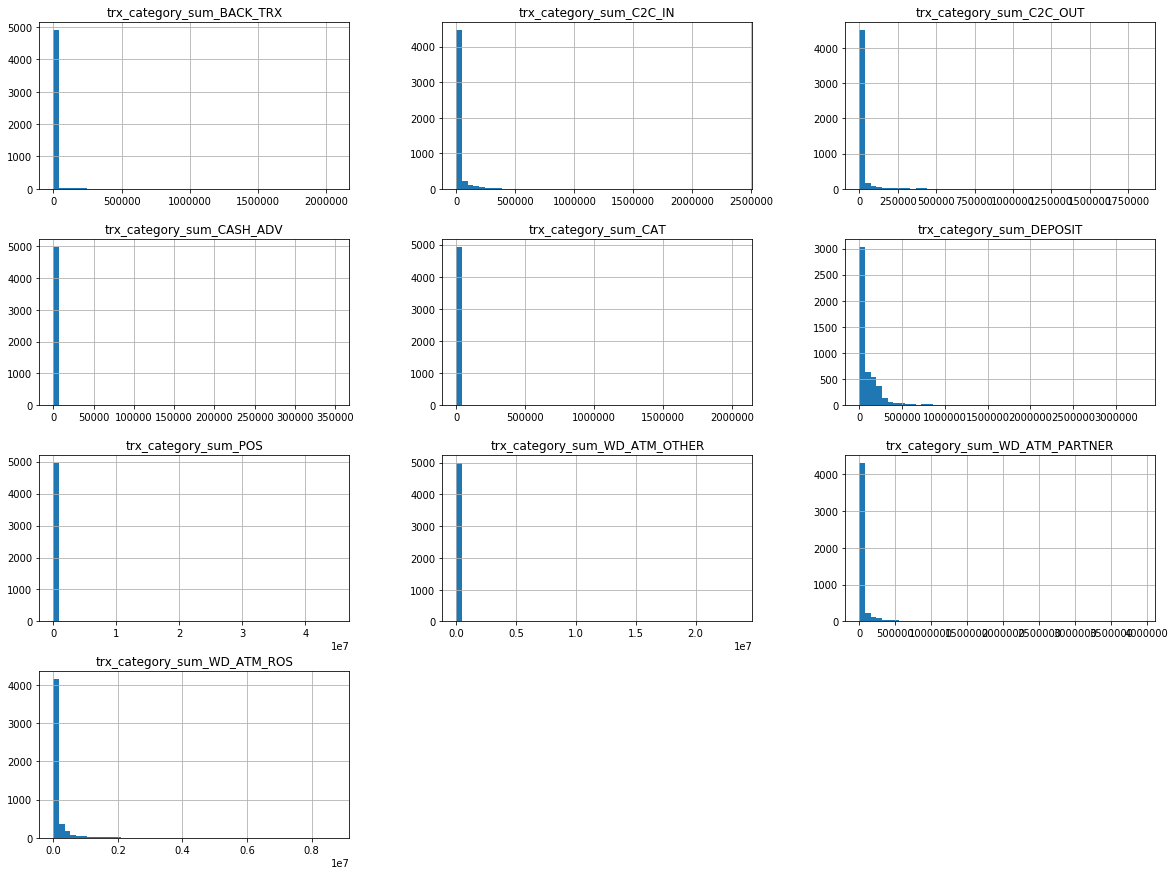

In [44]:
trx_agg.hist(bins=50, figsize=(20,15))

In [31]:
raw_mcc = raw_df.groupby('cl_id')[['MCC']].count()
raw_mcc.head(5)

,MCC
cl_id,
0,5
1,104
5,142
9,39
10,463


In [32]:
"отбор cl_id, которые производят операции только с одним кодом МСС. Можно предположить, что клиенты, производящие операции с определенным  кодом МСС перестают пользоваться банком чкркз какое-то время "
raw_mcc.loc[raw_mcc['MCC']==1]

,MCC
cl_id,
68,1
207,1
243,1
2476,1
2620,1
2787,1
3323,1
3416,1
3427,1
